# Recurrent Neural Network Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv('D:/ML-Datasets/Udemy-TimeSeries/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [3]:
# Check the data load
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
# Change the name of the columns to something proper
df.columns = ['Sales']

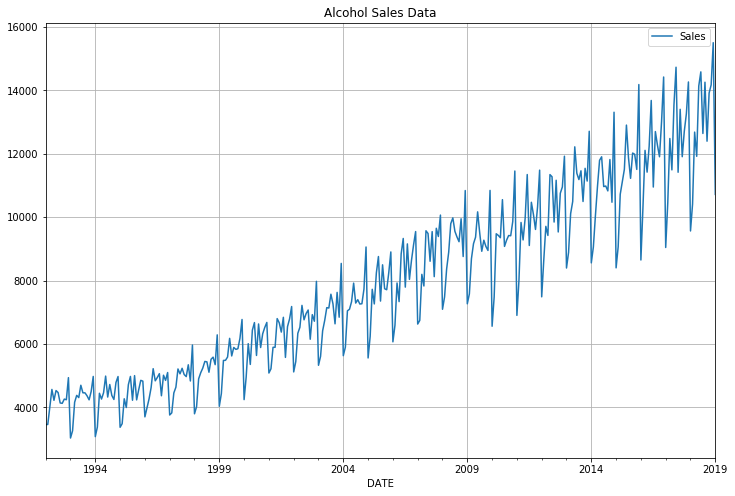

In [7]:
# Visualize the sales data
df.plot(figsize=(12, 8), legend=True, grid=True, title='Alcohol Sales Data')

### Lets perform ETS Decomposition to get an idea about trend and seasonality

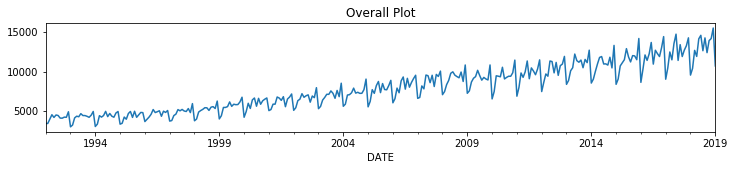

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12, 2), title='Overall Plot')

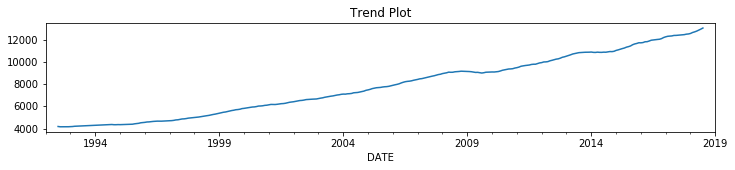

In [15]:
results.trend.plot(figsize=(12, 2), title='Trend Plot')

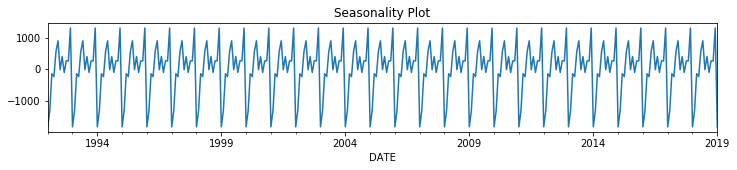

In [16]:
results.seasonal.plot(figsize=(12, 2), title='Seasonality Plot')

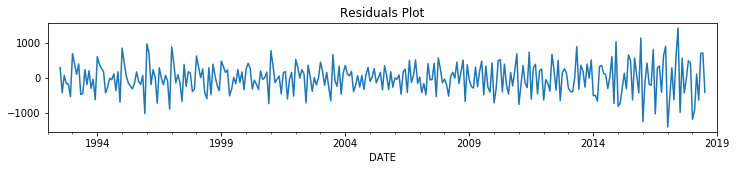

In [18]:
results.resid.plot(figsize=(12, 2), title='Residuals Plot')

## Train Test Split

In [19]:
len(df)

325

In [20]:
# We will forecast for 12 months and hence our test set should also have 12 months data
train = df.iloc[:313]
test = df.iloc[313:]

In [21]:
len(test)

12

## Scale Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
# Lets view the scaled training set
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [30]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [31]:
len(scaled_train)

313

In [32]:
len(generator) # n_input = 2

311

In [33]:
# What does the first batch look like?
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [34]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [35]:
# What does the first batch look like?
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


In [50]:
X.shape

(1, 12, 1)

In [51]:
y.shape

(1, 1)

### Create the Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
# fit the model
model.fit_generator(generator, epochs=50)

  ...
    to  
  ['...']
Train for 301 steps
Epoch 1/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0141
Epoch 2/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 3/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 4/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 5/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 6/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 8/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 9/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 10/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 11/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 12/50
301/301 [==============================] - 1s 3ms/

In [47]:
model.history.history.keys()

dict_keys(['loss'])

Text(0.5, 1.0, 'Loss Per Epochs')

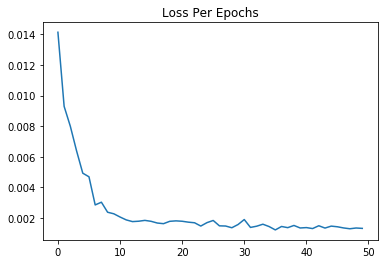

In [48]:
loss_per_epochs = model.history.history['loss']
plt.plot(range(len(loss_per_epochs)), loss_per_epochs)
plt.title("Loss Per Epochs")

## Evaluate on Test Data

In [49]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [52]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [57]:
# taking this and predict from the model
model.predict(first_eval_batch)

array([[0.67526424]], dtype=float32)

In [54]:
scaled_test[0]

array([0.63116506])

## Forecast using RNN Model

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead of historical 12 points ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store that prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
test_predictions

[array([0.67526424], dtype=float32),
 array([0.7735509], dtype=float32),
 array([0.7423862], dtype=float32),
 array([0.8955816], dtype=float32),
 array([0.95530033], dtype=float32),
 array([0.73197883], dtype=float32),
 array([0.8658869], dtype=float32),
 array([0.749651], dtype=float32),
 array([0.8265787], dtype=float32),
 array([0.86148036], dtype=float32),
 array([0.92507327], dtype=float32),
 array([0.57380885], dtype=float32)]

In [60]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[10930.9163357 ],
       [12080.77230245],
       [11716.17640984],
       [13508.40917408],
       [14207.05857372],
       [11594.42037517],
       [13161.01115489],
       [11801.1672222 ],
       [12701.14393872],
       [13109.45867622],
       [13853.43213928],
       [ 9743.98972279]])

In [62]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [63]:
# adding predictions to the test data frame
test['predictions'] = true_predictions

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
test

,Sales,predictions
DATE,,
2018-02-01,10415,10930.916336
2018-03-01,12683,12080.772302
2018-04-01,11919,11716.176410
2018-05-01,14138,13508.409174
2018-06-01,14583,14207.058574
2018-07-01,12640,11594.420375
2018-08-01,14257,13161.011155
2018-09-01,12396,11801.167222
2018-10-01,13914,12701.143939


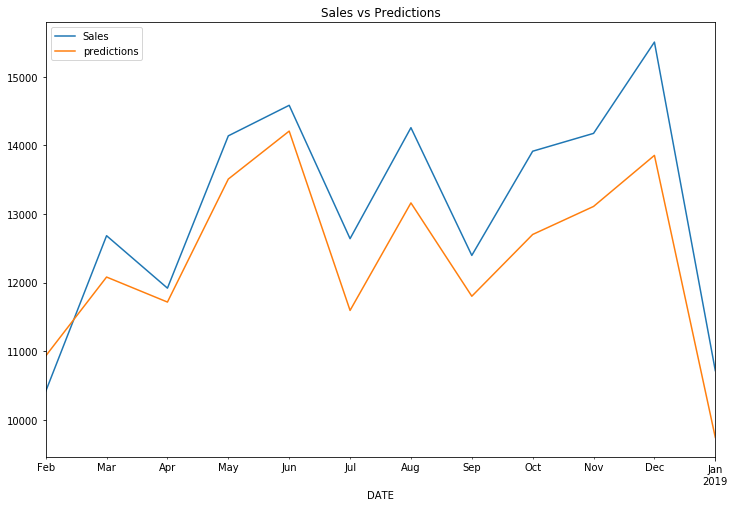

In [65]:
test.plot(figsize=(12, 8), legend=True, title='Sales vs Predictions')

# Saving and Loading Models

In [66]:
model.save('rnn_salesPredictions.h5')

## load a model

In [67]:
from tensorflow.keras.models import load_model
new_model = load_model('rnn_salesPredictions.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
